In [29]:
# dependancies and setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import datetime
import calendar

In [24]:
# import csv
cyber_data = pd.read_csv('Project_1_Team_Platypus/source_data/cyber_data_clean.csv')
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date
0,1054,725,TX,2012,2012-12-27
1,1053,438,CA,2011,2011-12-22
2,1052,818,MO,2009,2009-12-21
3,1050,676,MA,2012,2012-12-15
4,1049,638,CA,2012,2012-12-10


In [31]:
cyber_data['Month'] = pd.DatetimeIndex(cyber_data['Full Date']).month
cyber_data['Month'] = cyber_data['Month'].apply(lambda x: calendar.month_abbr[x])
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date,Month
0,1054,725,TX,2012,2012-12-27,Dec
1,1053,438,CA,2011,2011-12-22,Dec
2,1052,818,MO,2009,2009-12-21,Dec
3,1050,676,MA,2012,2012-12-15,Dec
4,1049,638,CA,2012,2012-12-10,Dec


**Where did the most & least data breaches occur?**

In [99]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
state_breach_count = pd.DataFrame(cyber_data.groupby(['State'])['Breach ID'].count().sort_values(ascending=False))

# use describe to identify min/max values for boolean then convert to int
st_breach_max = int(state_breach_count.describe().max()) 
st_breach_min = int(state_breach_count.describe().min())
state_breach_count.describe()

,Breach ID
count,49.000000
mean,20.775510
std,22.186957
min,1.000000
25%,6.000000
50%,14.000000
75%,26.000000
max,113.000000


In [181]:
# isolate the max state
state_breach_count[state_breach_count['Breach ID']==st_breach_max]
state_breach_count.head()

,Breach ID
State,
CA,113
TX,83
FL,66
NY,58
IL,49


In [43]:
#isolate the min state
state_breach_count[state_breach_count['Breach ID']==st_breach_min]

,Breach ID
State,
ME,1
SD,1
VT,1


In [179]:
# group data by state , month, year to define datat for plot over time
state_mo_breach = cyber_data.groupby(['Year','State'])['Breach ID'].count().sort_values()
state_mo_breach = pd.DataFrame(state_mo_breach.reset_index())
state_mo_breach.columns = ['Year', 'State', 'Breach Count']
state_mo_breach.head()

,Year,State,Breach Count
0,1997,NC,1
1,2012,SC,1
2,2012,NV,1
3,2012,NE,1
4,2012,MT,1


In [167]:
cyber_data['Year'].sort_values(ascending=False)
yr_breach_count = pd.DataFrame(cyber_data.groupby(['Year'])['Breach ID'].count())                              
yr_breach_count = yr_breach_count.rename(columns={'Breach ID': 'Breach Count'}) 
yr_breach_count.reset_index()

,Year,Breach Count
0,1997,1
1,2002,1
2,2003,1
3,2004,2
4,2005,2
5,2006,1
6,2007,1
7,2008,11
8,2009,55
9,2010,203


In [130]:
# get quartiles of Breach count per year
(q1,q2,q3) = yr_breach_count['Breach Count'].quantile([.25, .5, .75])
# find upper and lower bounds
mean =  yr_breach_count['Breach Count'].mean()
iqr = q3 - q1
low_bound = q1 - (1.5*iqr)
upr_bound = q3 + (1.5*iqr)
print(q3,q2,q1)
print(iqr)
print(low_bound)
print(upr_bound)
print(mean)

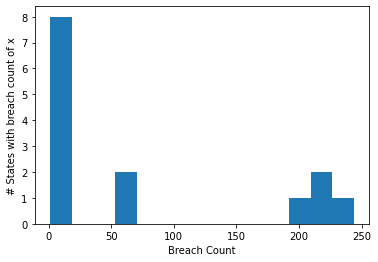

In [163]:
len_brch = len(yr_breach_count['Breach Count'])
plt.hist(yr_breach_count['Breach Count'], bins=len_brch)
plt.xlabel('Breach Count')
plt.ylabel('# States with breach count of x')
plt.show()

## Isolate data to most occurances of data breaches
* CA
* TX

In [183]:
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date,Month
0,1054,725,TX,2012,2012-12-27,Dec
1,1053,438,CA,2011,2011-12-22,Dec
2,1052,818,MO,2009,2009-12-21,Dec
3,1050,676,MA,2012,2012-12-15,Dec
4,1049,638,CA,2012,2012-12-10,Dec


In [182]:
cyber_data.loc[cyber_data['']]

,Unnamed: 0,Breach ID,State,Year,Full Date,Month
0,1054,725,TX,2012,2012-12-27,Dec
1,1053,438,CA,2011,2011-12-22,Dec
2,1052,818,MO,2009,2009-12-21,Dec
3,1050,676,MA,2012,2012-12-15,Dec
4,1049,638,CA,2012,2012-12-10,Dec


----
# **Fire Data** 

In [36]:
# pull in fire data from API results
firedf = pd.read_csv('Project_1_Team_Platypus/source_data/disaster_data.csv')
firedf.head()

,Unnamed: 0,dis_id,date,state,type
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire


In [40]:
# add month and yr columns
firedf['month'] = pd.DatetimeIndex(firedf['date']).month
firedf['year'] = pd.DatetimeIndex(firedf['date']).year
firedf.head()

,Unnamed: 0,dis_id,date,state,type,month,year
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire,2,2008
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire,2,2008
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire,2,2008
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire,2,2008
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire,2,2008


In [41]:
# change month # to month name
firedf['month'] = firedf['month'].apply(lambda x: calendar.month_abbr[x])
firedf.head()

,Unnamed: 0,dis_id,date,state,type,month,year
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire,Feb,2008
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire,Feb,2008
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire,Feb,2008
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire,Feb,2008
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire,Feb,2008


In [170]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
st_fire_count = pd.DataFrame(firedf.groupby(['state'])['dis_id'].count().sort_values(ascending=False))

# use describe to identify min/max values for boolean then convert to int
st_fire_max = int(st_fire_count.describe().max()) 
st_fire_min = int(st_fire_count.describe().min())
st_fire_count.describe()

,dis_id
count,21.000000
mean,41.238095
std,114.764064
min,1.000000
25%,4.000000
50%,8.000000
75%,26.000000
max,533.000000


In [177]:
# isolate the max state
st_fire_count[st_fire_count['dis_id']==st_fire_max]
st_fire_count.head(3)

,dis_id
state,
TX,533
CA,91
OK,55
